In [2]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate
import matplotlib

In [ ]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [3]:
def mean(arr):
    return np.mean(arr)

def error(x):
    return x.std() / np.sqrt(x.size)

def weighted_error(x, err):
    
    x = np.asarray(x)
    err = np.asarray(err)
    
    average = np.sum(x/(err**2))/np.sum(1/err**2)
    
    average_error = 1/np.sqrt(np.sum(1/err**2))
    
    return average, average_error


In [4]:
def V_to_Q(V):
   
    C = 100/(10**9)
    Q = C*V
    
    return Q

def fit_sila_naboj(Q,A):
    return A*(Q**2)

def fit2_sila_naboj(Q,A,b):
    return A*Q + b

U = [5,10,15,20,25]
a = np.array([5,6.5,7,8])
a_m = a/100

F = np.array([
    [0.08,0.2,0.25,0.36,0.42],
    [0.05,0.14,0.27,0.35,0.45],
    [0.1,0.16,0.22,0.32,0.39],
    [0.06,0.14,0.22,0.34,0.42]
])

F4 = np.array([0.08,0.15,0.26,0.38])
Q4_volt = np.array([0.02,0.6,1,1.9])

Q_volt = np.array([
    [0.1,0.2,0.4,0.6,1],
    [0.1,0.2,0.3,0.4,0.8],
    [0.1,0.2,0.3,0.4,0.5],
    [0.01,0.1,0.1,0.3,0.5]
])

a_m

In [5]:
U = [5,10,15,20,25]
a = np.array([5,5.5,6.5,7])
a_m = a/100

F = np.array([
    [0.1,0.2,0.4,0.5,0.6],
    [0.1,0.2,0.4,0.6,0.9],
    [0.1,0.2,0.4,0.6,0.8],
    [0.1,0.1,0.2,0.2,0.3]
])

F4 = np.array([0.08,0.15,0.26,0.38])
Q4_volt = np.array([0.02,0.6,1,1.9])

Q_volt = np.array([
    [0.07,0.11,0.15,0.23,0.32],
    [0.07,0.16,0.21,0.24,0.29],
    [0.04,0.13,0.19,0.27,0.3],
    [0.13,0.13,0.18,0.2,0.28]
])

a_m

array([0.05 , 0.055, 0.065, 0.07 ])

In [6]:
F = F/(10**3)
F4 = F4/(10**3)
F

array([[0.0001, 0.0002, 0.0004, 0.0005, 0.0006],
       [0.0001, 0.0002, 0.0004, 0.0006, 0.0009],
       [0.0001, 0.0002, 0.0004, 0.0006, 0.0008],
       [0.0001, 0.0001, 0.0002, 0.0002, 0.0003]])

In [7]:
Q = V_to_Q(Q_volt)
Q4 = V_to_Q(Q4_volt)

Q

array([[7.0e-09, 1.1e-08, 1.5e-08, 2.3e-08, 3.2e-08],
       [7.0e-09, 1.6e-08, 2.1e-08, 2.4e-08, 2.9e-08],
       [4.0e-09, 1.3e-08, 1.9e-08, 2.7e-08, 3.0e-08],
       [1.3e-08, 1.3e-08, 1.8e-08, 2.0e-08, 2.8e-08]])

In [8]:
A_spoct = F/(Q**2)
print(A_spoct)

A_prumer = [mean(A_spoct[i]) for i in range(4)]
A_chyba = [error(A_spoct[i]) for i in range(4)]
print(A_prumer)
print(A_chyba)

[[2.04081633e+12 1.65289256e+12 1.77777778e+12 9.45179584e+11
  5.85937500e+11]
 [2.04081633e+12 7.81250000e+11 9.07029478e+11 1.04166667e+12
  1.07015458e+12]
 [6.25000000e+12 1.18343195e+12 1.10803324e+12 8.23045267e+11
  8.88888889e+11]
 [5.91715976e+11 5.91715976e+11 6.17283951e+11 5.00000000e+11
  3.82653061e+11]]
[1400520750082.5688, 1168183409907.7603, 2050679870007.7104, 536673792900.8991]
[243874908126.3456, 200501689271.34457, 940889710276.2058, 38794140955.830025]


In [9]:
A_fit = []
A_fit_err = []

for i in range(4):
    params, err = curve_fit(fit_sila_naboj, Q[i], F[i], p0 = [1000000000000])

    A_err = np.sqrt(np.diag(err))
    A, = params
    
    A_fit.append(A)
    A_fit_err.append(A_err[0])


print(A_fit)
print(A_fit_err)

[714856698287.4338, 1025759234739.6005, 891122693441.0526, 441738172415.48737]
[138145853392.6695, 45148037545.80372, 55352865347.360664, 43861859062.356735]


In [10]:
A2_fit = []
A2_fit_err = []
B = []

for i in range(4):
    params, err = curve_fit(fit2_sila_naboj, Q[i]**2, F[i],p0 = [900000000000000,0])

    A2_err, b_err = np.sqrt(np.diag(err))
    A2, b = params
    
    A2_fit.append(A2)
    A2_fit_err.append(A2_err)
    B.append(b)
 

print(A2_fit)
print(B)
print(A2_fit_err)

[465703787424.07404, 1047896819523.219, 764175206527.9222, 319422217832.0699]
[0.00017856180441957998, -1.3320163279460266e-05, 8.758378529776024e-05, 6.206931734373151e-05]
[133010019558.57346, 97177235139.36786, 50362766945.820946, 50605241783.79364]


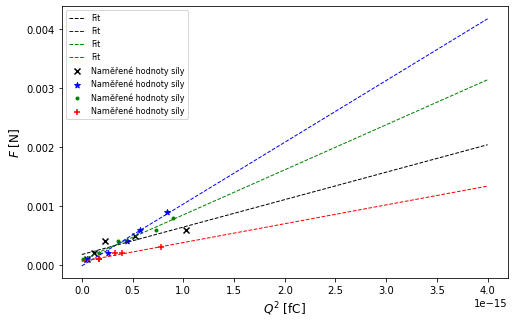

In [11]:
x_range = np.linspace(0,0.4*(10**(-14)),500)

plt.figure(figsize = (8,5))

plt.scatter(Q[0]**2,F[0], marker = 'x', color='black', label='Naměřené hodnoty síly')
plt.scatter(Q[1]**2,F[1], marker = '*', color='blue', label='Naměřené hodnoty síly')
plt.scatter(Q[2]**2,F[2], marker = '.', color='green', label='Naměřené hodnoty síly')
plt.scatter(Q[3]**2,F[3], marker = '+', color='red', label='Naměřené hodnoty síly')


#plt.plot(x_range, fit_sila_naboj(x_range,A_fit[0]) , color="k", linestyle='dashed', linewidth=1, label='Fit')
plt.plot(x_range, A2_fit[0]*x_range + B[0] , color="k", linestyle='dashed', linewidth=1, label='Fit')
plt.plot(x_range, A2_fit[1]*x_range + B[1] , color="b", linestyle='dashed', linewidth=1, label='Fit')
plt.plot(x_range, A2_fit[2]*x_range + B[2], color="g", linestyle='dashed', linewidth=1, label='Fit')
plt.plot(x_range, A2_fit[3]*x_range + B[3], color="r", linestyle='dashed', linewidth=1, label='Fit')

plt.legend(loc='upper left', fontsize=8)
#plt.legend(fontsize=8)

#popisky os
plt.ylabel("$F$ [N]", fontsize=12)
plt.xlabel("$Q^2$ [fC]", fontsize=12)



plt.savefig('a4.pdf')
plt.show()


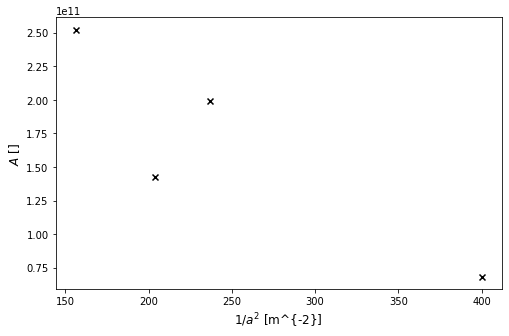

In [278]:
#x_range = np.linspace(0,1.2*(10**(-14)),500)

plt.figure(figsize = (8,5))

plt.scatter(1/a_m**2,A2_fit, marker = 'x', color='black', label='Naměřené hodnoty síly')


#plt.plot(x_range, fit_sila_naboj(x_range,A_fit[0]) , color="k", linestyle='dashed', linewidth=1, label='Fit')
#plt.plot(x_range, A2_fit[1]*x_range , color="k", linestyle='dashed', linewidth=1, label='Fit')

#plt.legend(loc='upper left', fontsize=8)
#plt.legend(fontsize=8)

#popisky os
plt.ylabel("$A$ []", fontsize=12)
plt.xlabel("$1/a^2$ [m^{-2}]", fontsize=12)



plt.savefig('A_a.pdf')
plt.show()
